In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from cnn_utils import url_to_image,make_gradcam_heatmap,convert_image,save_and_display_gradcam
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


clf = keras.models.load_model('../Model/coffee_img_model_t2.h5')
with open('../Model/coffee_img_label.txt', "r") as f:
	label_dict = {v:k for k,v in eval(f.read()).items()}
dim = (500,500,3)

In [2]:
def url_predict_plot(url,conv_layer):
	test_IMG = url_to_image(url)
	test_convert = convert_image(test_IMG,dim)
	test_vec = np.expand_dims(test_convert,axis=0) # 一个图片因此加dim
	test_vec=tf.cast(test_vec,tf.float32)
	result = clf.predict(test_vec)
	predict_label, prediction_prob = result.argmax(), result.max()
	print('prediction is {0} with prob {1}'.format(label_dict[predict_label], prediction_prob))
	heatmap = make_gradcam_heatmap(test_vec, clf, conv_layer)
	# plt.imshow(heatmap)
	# plt.show()
	save_and_display_gradcam(test_IMG, heatmap,test_IMG.size,label_dict[predict_label], alpha=0.8)

In [3]:
url1 = 'https://img.alicdn.com/bao/uploaded/i3/1752533979/O1CN01VT7bYk1fGQZ3Li5Pj_!!1752533979.jpg' # GCOFFEE
url2 = 'https://img.alicdn.com/bao/uploaded/i1/1724505357/TB2EvprhlDH8KJjSszcXXbDTFXa_!!1724505357.jpg' # RTDC
url3 = 'https://img.alicdn.com/bao/uploaded/i4/2549841410/O1CN01tbWrDO1MHp9vTP2t6_!!2549841410.jpg' # RTDC
url4 = 'https://img.alicdn.com/bao/uploaded/i3/1724505357/O1CN01SYl5Vs1pRYMcZdflg_!!1724505357.jpg' # COFF
urls = [url1,url2,url3,url4]

prediction is DRINK_COFFEE with prob 0.3548109233379364


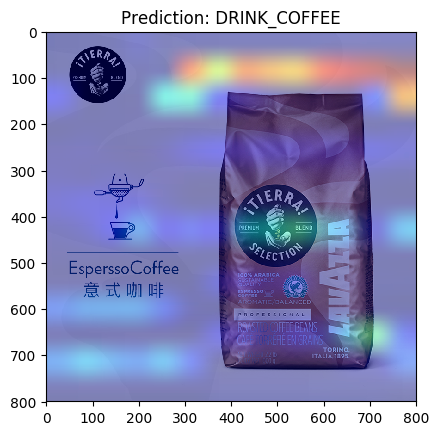

prediction is INSTANT_COFFEE with prob 0.4232681393623352


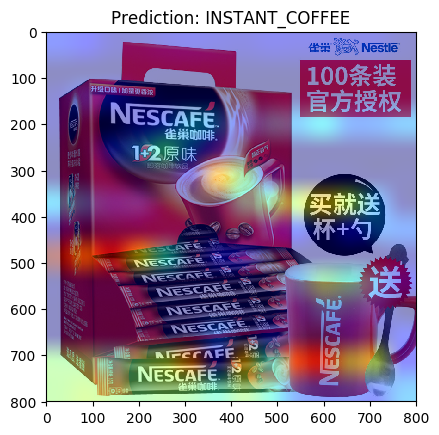

prediction is INSTANT_COFFEE with prob 0.41137951612472534


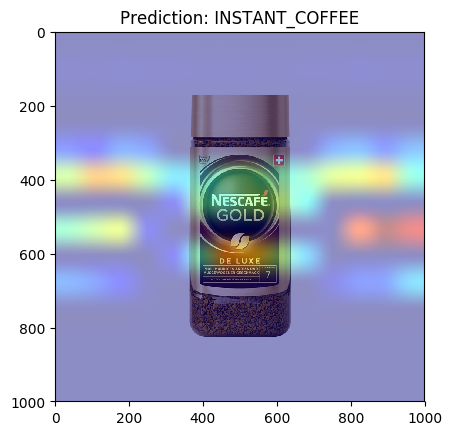

prediction is DRINK_COFFEE with prob 0.394673615694046


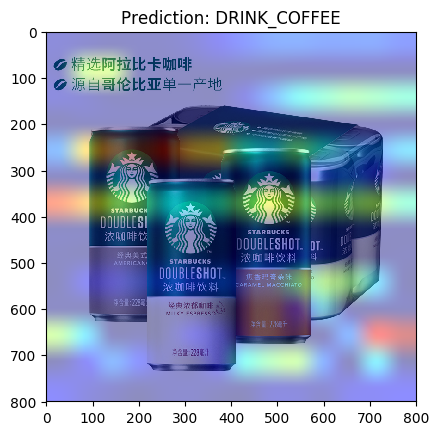

In [4]:
for url in urls:
	url_predict_plot(url,'conv2d_202')

prediction is DRINK_COFFEE with prob 0.3548109233379364


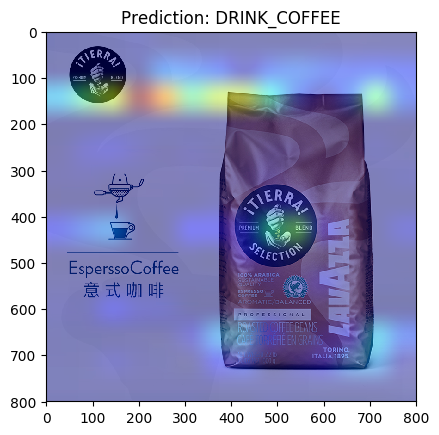

prediction is INSTANT_COFFEE with prob 0.4232681393623352


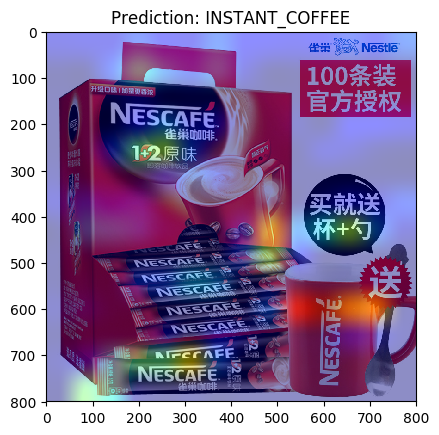

prediction is INSTANT_COFFEE with prob 0.41137951612472534


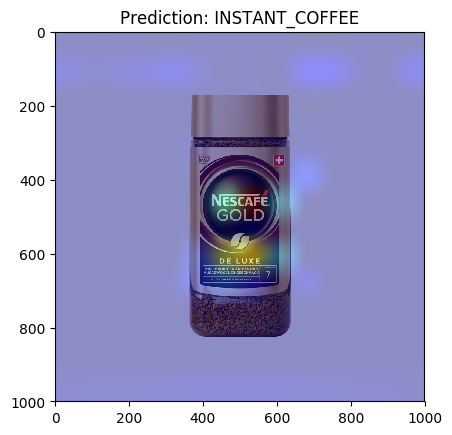

prediction is DRINK_COFFEE with prob 0.394673615694046


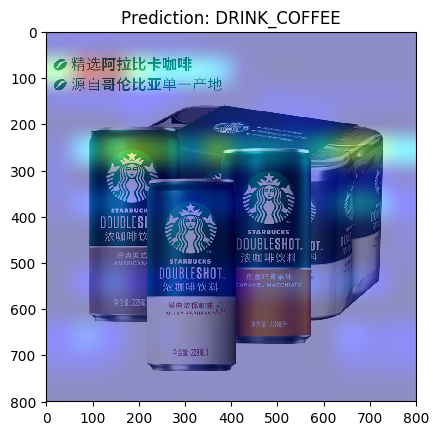

In [5]:
for url in urls:
	url_predict_plot(url,'conv_7b')